In [111]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [112]:
# these two function determine the intensity probability function
def f1(y,k,phi0):
    return (np.cos(y*k*phi0)-1)/y/np.sqrt(-np.log(y))
def f2(y,k,phi0):
    return np.sin(y*k*phi0)/y/np.sqrt(-np.log(y))

In [113]:
k_limit = 200
steps = 10000
k = np.linspace(0,k_limit,steps)
d = k_limit/steps

In [114]:
def f1_int(k,phi0):
    if hasattr(k,'__iter__'):
        return np.array([quad(f1,0,1,args=(kk,phi0))[0] for kk in k])
    else:
        return quad(f1,0,1,args=(k,phi0))[0]

def f2_int(k,phi0):
    if hasattr(k,'__iter__'):
        return np.array([quad(f2,0,1,args=(kk,phi0))[0] for kk in k])
    else:
        return quad(f2,0,1,args=(k,phi0))[0]        

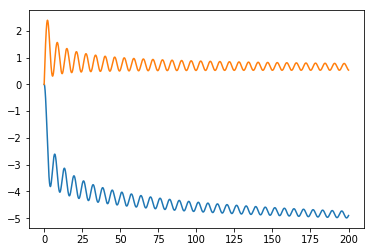

In [115]:
f1k = f1_int(k,1)
f2k = f2_int(k,1)
plt.plot(k,f1k)
plt.plot(k,f2k)

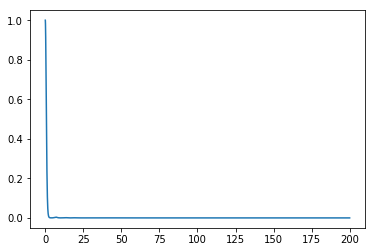

In [116]:
prefactor = 3/np.sqrt(2)
er = np.exp(prefactor*f1k)
ei1 = np.cos(prefactor*f2k)
ei2 = np.sin(prefactor*f2k)
plt.plot(k,er)

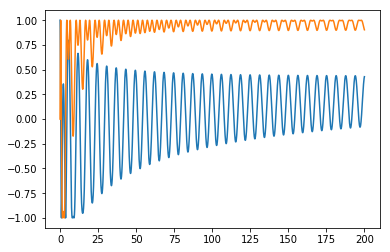

In [117]:
plt.plot(k,ei1)
plt.plot(k,ei2)

(0, 50)

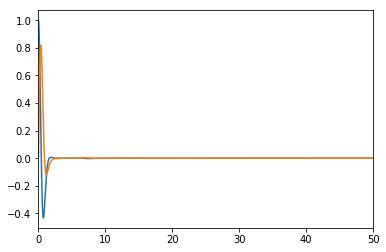

In [118]:
plt.plot(k,er*ei1)
plt.plot(k,er*ei2)
plt.xlim((0,50))

19999


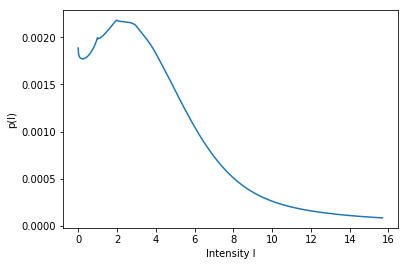

In [119]:
# need to find the proper way of doing an fft
freq = np.fft.fftfreq(2*steps-1,d)*2*np.pi
fc1 = er*ei1+1j*er*ei2
fc2 = er*ei1-1j*er*ei2
fc2 = np.conj(fc2[::-1])
fc = np.concatenate((fc1,fc2[1:]))
cf_fft = np.fft.ifft(fc)
print(cf_fft.size)
disp = 1000
plt.plot(freq[:disp],abs(cf_fft[:disp]))
#plt.xlim((0,10000))
#plt.ylim((-.2,.2))
plt.xlabel("Intensity I")
plt.ylabel("p(I)")
plt.savefig("pIanalytic3.png",format='png',dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")